<a href="https://colab.research.google.com/github/vishwanaik15/DMASSIGNMENT02/blob/main/Naik_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:Naik Vishwa chetankumar                                                     
UTA ID:1001871311                                                                
CSE-5334-002 Data Mining                                                         
Assignment 02**

**Task:The goal of this assignment is to learn about the concept of overfitting using the Higher order linear regression.**

**Importing required dependencies**


In [ ]:
import operator
from math import *
import random
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**A.Generate 20 data pairs (X, Y) using y = sin(2*pi*X) + N**


*   Use uniform distribution between 0 and 1 for X
*   Sample N from the normal gaussian distribution 



In [ ]:
X=[]
Y=[]
data =[]
mu, sigma = 0,1
for i in range(20):
    X1 = random.uniform(0,1)    
    N = np.random.normal(mu,sigma)
    Y1 = sin(2*pi*X1) + N
    X = np.append(X,X1)
    Y = np.append(Y,Y1)
data = np.column_stack((X,Y)) 
#column_stack is used to make 2D array from two 1D arrays
print(data)

[[ 2.45340025e-02 -5.40945781e-01]
 [ 1.55162323e-01  1.33925846e+00]
 [ 4.61294439e-01 -5.32900808e-01]
 [ 2.54563849e-02  2.77936325e-01]
 [ 1.52897135e-03 -8.83863102e-01]
 [ 6.25558414e-02  8.08191237e-01]
 [ 3.03344950e-01  1.50878427e+00]
 [ 5.45283269e-02  1.65843841e+00]
 [ 2.12109074e-01  3.47073168e-01]
 [ 4.22831280e-03  1.63866512e+00]
 [ 3.07932083e-01  1.18218467e+00]
 [ 8.18748906e-01 -1.08480438e+00]
 [ 5.95667617e-01  7.84279211e-01]
 [ 8.02014741e-01  7.01546678e-01]
 [ 4.92871578e-01 -8.52999209e-01]
 [ 1.77334928e-01  7.58298271e-01]
 [ 9.71645622e-01 -1.23664867e+00]
 [ 9.53176566e-01  7.34909392e-01]
 [ 6.36632580e-01 -8.01546193e-01]
 [ 8.33895931e-01  6.87692947e-01]]


**Use 10 for train and 10 for test**



In [ ]:
#splitting data into two equal parts: train and test both having 10 pairs
X_train, X_test, Y_train, Y_test = train_test_split(data, Y, test_size=0.5)

In [ ]:
print(X_train)

[[ 0.15516232  1.33925846]
 [ 0.97164562 -1.23664867]
 [ 0.21210907  0.34707317]
 [ 0.95317657  0.73490939]
 [ 0.63663258 -0.80154619]
 [ 0.05452833  1.65843841]
 [ 0.59566762  0.78427921]
 [ 0.17733493  0.75829827]
 [ 0.30334495  1.50878427]
 [ 0.49287158 -0.85299921]]


In [ ]:
X_train = X_train[:,0].reshape(-1,1) 
#reshape is used to make array in column-wise
print(X_train)

[[0.15516232]
 [0.97164562]
 [0.21210907]
 [0.95317657]
 [0.63663258]
 [0.05452833]
 [0.59566762]
 [0.17733493]
 [0.30334495]
 [0.49287158]]


In [ ]:
print(X_test)

[[ 2.45340025e-02 -5.40945781e-01]
 [ 4.22831280e-03  1.63866512e+00]
 [ 6.25558414e-02  8.08191237e-01]
 [ 3.07932083e-01  1.18218467e+00]
 [ 8.18748906e-01 -1.08480438e+00]
 [ 8.02014741e-01  7.01546678e-01]
 [ 1.52897135e-03 -8.83863102e-01]
 [ 8.33895931e-01  6.87692947e-01]
 [ 4.61294439e-01 -5.32900808e-01]
 [ 2.54563849e-02  2.77936325e-01]]


In [ ]:
X_test = X_test[:,0].reshape(-1,1)
print(X_test)

[[0.024534  ]
 [0.00422831]
 [0.06255584]
 [0.30793208]
 [0.81874891]
 [0.80201474]
 [0.00152897]
 [0.83389593]
 [0.46129444]
 [0.02545638]]


In [ ]:
Y_train = Y_train.reshape(-1,1)
print(Y_train)

[[ 1.33925846]
 [-1.23664867]
 [ 0.34707317]
 [ 0.73490939]
 [-0.80154619]
 [ 1.65843841]
 [ 0.78427921]
 [ 0.75829827]
 [ 1.50878427]
 [-0.85299921]]


In [ ]:
Y_test = Y_test.reshape(-1,1)
print(Y_test)

[[-0.54094578]
 [ 1.63866512]
 [ 0.80819124]
 [ 1.18218467]
 [-1.08480438]
 [ 0.70154668]
 [-0.8838631 ]
 [ 0.68769295]
 [-0.53290081]
 [ 0.27793633]]


In [ ]:
# importing some more dependencies
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
import math

<b>B.Using root mean square error, find weights of polynomial regression for order is 0, 1, 3, 9
</b>

In [ ]:
#np.polyfit is used to print and calculate weights of polynomial regression
print("Weights of polynomial regression of order 0 are: \n", np.polyfit(X_train[:,0],Y_train[:,0],0).reshape(-1,1))
print("\nWeights of polynomial regression of order 1 are: \n", np.polyfit(X_train[:,0],Y_train[:,0],1).reshape(-1,1))
print("\nWeights of polynomial regression of order 3 are: \n", np.polyfit(X_train[:,0],Y_train[:,0],3).reshape(-1,1))
print("\nWeights of polynomial regression of order 9 are: \n", np.polyfit(X_train[:,0],Y_train[:,0],9).reshape(-1,1))

Weights of polynomial regression of order 0 are: 
 [[0.42398471]]

Weights of polynomial regression of order 1 are: 
 [[-1.9728448 ]
 [ 1.32211709]]

Weights of polynomial regression of order 3 are: 
 [[-0.92051149]
 [ 4.67500916]
 [-5.97597677]
 [ 1.9408048 ]]

Weights of polynomial regression of order 9 are: 
 [[-4.83411498e+05]
 [ 1.92284434e+06]
 [-3.14746391e+06]
 [ 2.74418260e+06]
 [-1.37781098e+06]
 [ 4.01286920e+05]
 [-6.45609180e+04]
 [ 5.02120112e+03]
 [-1.33158573e+02]
 [ 1.50571633e+00]]


<b>C.Display weights in table </b>

In [ ]:
print("Table of weights")
table = {'M=0': np.polyfit(X_train[:,0],Y_train[:,0],0), 
         'M=1': np.polyfit(X_train[:,0],Y_train[:,0],1),
         'M=6': np.polyfit(X_train[:,0],Y_train[:,0],6),
         'M=9': np.polyfit(X_train[:,0],Y_train[:,0],9),
        }
pd.DataFrame({ key:pd.Series(value) for key, value in table.items() })

Table of weights


,M=0,M=1,M=6,M=9
0,0.423985,-1.972845,-469.926894,-4.834115e+05
1,NaN,1.322117,680.052962,1.922844e+06
2,NaN,NaN,43.683554,-3.147464e+06
3,NaN,NaN,-440.460720,2.744183e+06
4,NaN,NaN,216.567490,-1.377811e+06
5,NaN,NaN,-38.350202,4.012869e+05
6,NaN,NaN,3.207342,-6.456092e+04
7,NaN,NaN,NaN,5.021201e+03
8,NaN,NaN,NaN,-1.331586e+02
9,NaN,NaN,NaN,1.505716e+00


<b>D. Draw a chart of fit data
</b>

In [ ]:
#sorted X and Y data simultaneously to get proper line graph ouput 
X_train, Y_train = zip(*sorted(zip(X_train, Y_train)))

Chartes for different degrees:
Chart for degree = 0


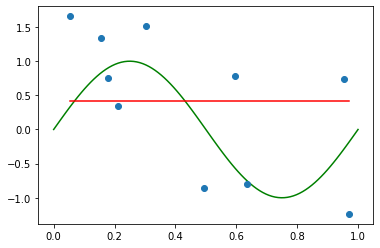

------------------------------------------------------------
Chart for degree = 1


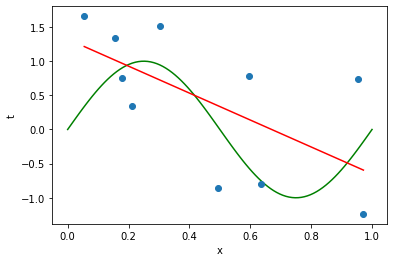

------------------------------------------------------------
Chart for degree = 2


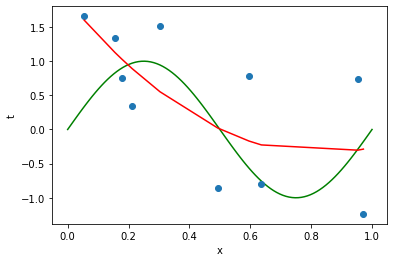

------------------------------------------------------------
Chart for degree = 3


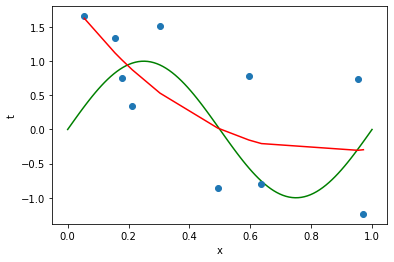

------------------------------------------------------------
Chart for degree = 4


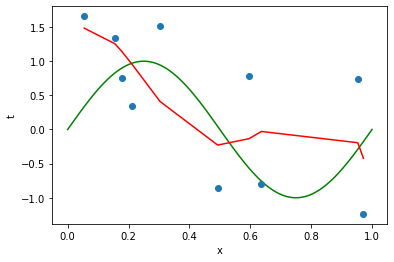

------------------------------------------------------------
Chart for degree = 5


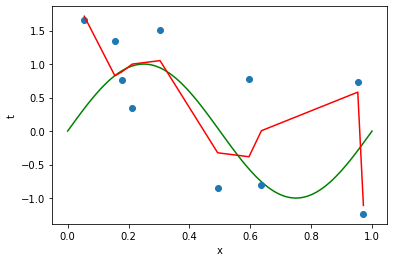

------------------------------------------------------------
Chart for degree = 6


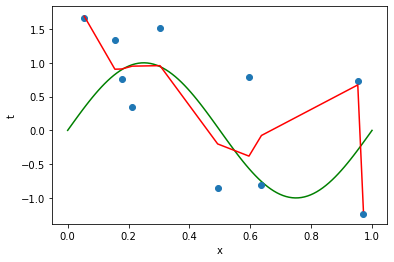

------------------------------------------------------------
Chart for degree = 7


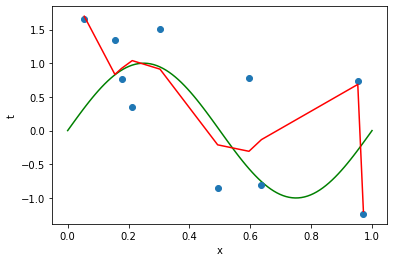

------------------------------------------------------------
Chart for degree = 8


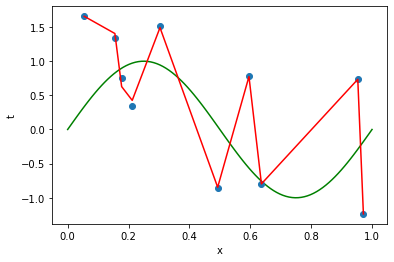

------------------------------------------------------------
Chart for degree = 9


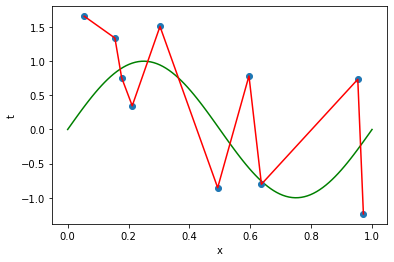

------------------------------------------------------------


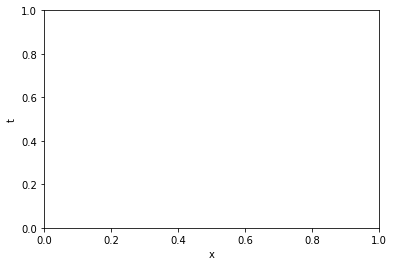

In [ ]:
print("Chartes for different degrees:")
for i in range(10):
    print('Chart for degree = %d' %(i))
    #using original sine curve to get some reference that how much our curve fits
    x = np.linspace(0, 1, 100)
    y = np.sin(2*pi*x)
    plt.plot(x,y,color='g') 
    
    #furthur we will generate polynomial features for given degrees (0 - 9)
    poly_features=PolynomialFeatures(degree=i)
    #fits training data for given degree and transform it to X_poly
    X_poly=poly_features.fit_transform(X_train)
    
    model=LinearRegression()
    #fit linear regression model for given X and Y data
    model.fit(X_poly,Y_train) 
    plt.plot(X_train,Y_train,'o')
    plt.plot(X_train,model.predict(X_poly), color='r')
    plt.show()
    plt.xlabel('x') #x-label
    plt.ylabel('t') #y-label
    print("-"*60)

<b>E.Draw train error vs test error</b>

In [ ]:
rmse_train=[]
rmse_test=[]

#i used for loop to get 
for i in range(10):
    poly_features = PolynomialFeatures(degree=i)
    X_poly=poly_features.fit_transform(X_train)
    model=LinearRegression()
    model.fit(X_poly,Y_train) 
    rmse = sqrt(mean_squared_error(Y_train, model.predict(poly_features.fit_transform(X_train))))
    rmse_train.append(rmse)
    
    X_poly=poly_features.fit_transform(X_test)
    rmset = sqrt(mean_squared_error(Y_test, model.predict(poly_features.fit_transform(X_test))))
    rmse_test.append(rmset)

In [ ]:
print(rmse_train)

[0.9885785973903705, 0.7722506806784536, 0.7291474332911401, 0.7289919562315563, 0.7153787684584796, 0.5701911173045919, 0.5653210592654266, 0.5631585162281897, 0.0529811418059452, 3.54844102133669e-10]


In [ ]:
print(rmse_test)

[0.9055094878062406, 1.1435351445474622, 1.3849310717651122, 1.4086465186010049, 1.1706218558700692, 2.899802147712397, 2.623618614843447, 3.062210362444384, 23.018744431860643, 25.43017677379238]


Graph for Train error vs Test error


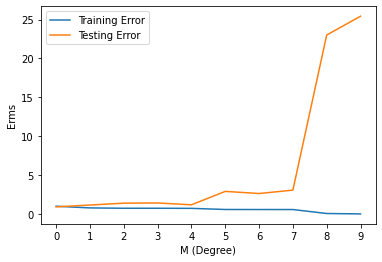

In [ ]:
print("Graph for Train error vs Test error")
degree = ['0','1','2','3','4','5','6','7','8','9']

#using fig method to use egend method and plot the chart
fig,ax = plt.subplots()
ax.plot(degree, rmse_train, label = 'Training Error')
ax.plot(degree, rmse_test, label = 'Testing Error')
leg = ax.legend()
plt.xlabel('M (Degree)')
plt.ylabel('Erms')
plt.show()

<b>F.Now generate 100 more data and fit 9th order model and draw fit.
</b>

In [ ]:
mu,sigma = 0,1
X = []
Y = []
for i in range(100):
    X1 = random.uniform(0,1)
    N = np.random.normal(mu,sigma)
    Y1 = sin(2*pi*X1) + N
    X = np.append(X,X1)
    Y = np.append(Y,Y1)
new_data = np.column_stack((X,Y))

In [ ]:
X = new_data[:,0].reshape(-1,1)
Y = new_data[:,1].reshape(-1,1)

In [ ]:
X,Y = zip(*sorted(zip(X, Y)))

Draw Fit


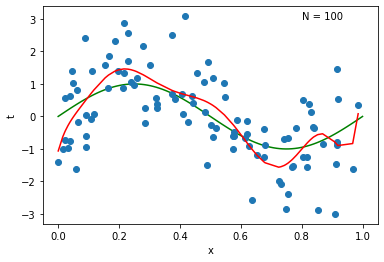

In [ ]:
print("Draw Fit")
x = np.linspace(0, 1, 100) 
y = np.sin(2*pi*x)  
plt.plot(x,y,color='g') 

poly_features=PolynomialFeatures(9)
X_poly=poly_features.fit_transform(X)
model=LinearRegression()
model.fit(X_poly,Y) 
plt.plot(X,Y,'o')
plt.plot(X,model.predict(X_poly), color='r') #predicting Y value from X value and then plot it

plt.text(0.8, 3,'N = 100')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

<b>Selected 20 data and fit 9th order model and draw fit</b>

In [ ]:
X20 = new_data[:20,0].reshape(-1,1)
Y20 = new_data[:20,1].reshape(-1,1)
X20,Y20 = zip(*sorted(zip(X20, Y20)))

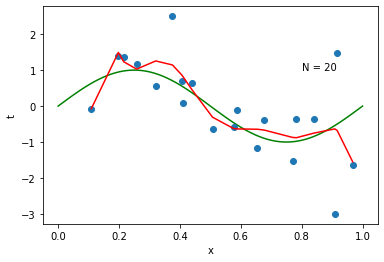

In [ ]:
x = np.linspace(0, 1, 100) 
y = np.sin(2*pi*x)  
plt.plot(x,y,color='g') 

poly_features=PolynomialFeatures(9)
X_poly=poly_features.fit_transform(X20)
model=LinearRegression()

model.fit(X_poly,Y20) 
plt.plot(X20,Y20,'o')
plt.plot(X20,model.predict(X_poly), color='r')

plt.text(0.8,1,'N = 20')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

<b>G.Now we will regularize using the sum of weights.</b></br>
<b>H.Draw chart for lambda is 1, 1/10, 1/100, 1/1000, 1/10000, 1/100000 </b>

In [ ]:
lamda = [1, 1/10, 1/100, 1/1000, 1/10000, 1/100000]
train_error_for_lamda = []
test_error_for_lamda = []

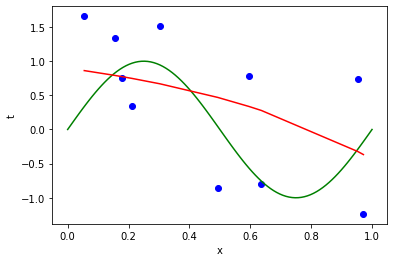

------------------------------------------------------------


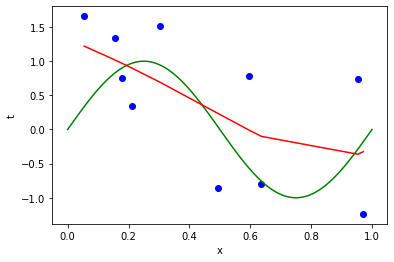

------------------------------------------------------------


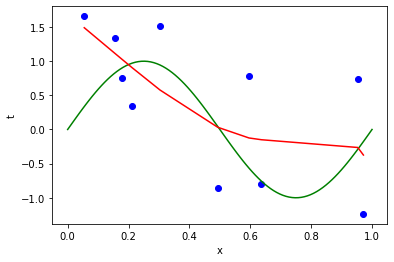

------------------------------------------------------------


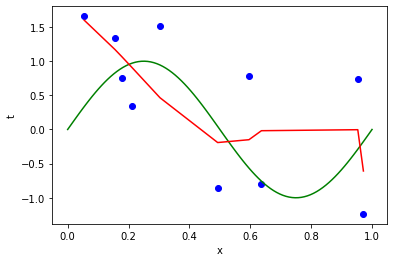

------------------------------------------------------------


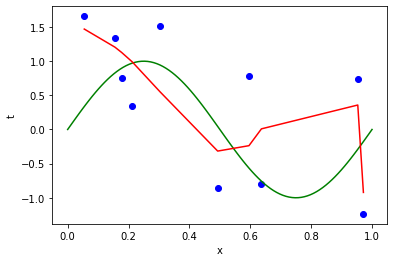

------------------------------------------------------------


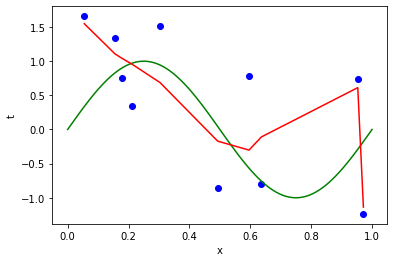

------------------------------------------------------------


In [ ]:
for i in lamda:
    x = np.linspace(0, 1, 100)
    y = np.sin(2*pi*x)
    plt.plot(x,y,color='g')
    
    poly_features = PolynomialFeatures(9)
    X_poly = poly_features.fit_transform(X_train)
    poly_features.fit(X_poly,Y_train) 
    reg = linear_model.Ridge(alpha = i) #taking lamda values in alpha and then fit ridge model
    reg.fit(X_poly, Y_train)
    
    Y_pred = reg.predict(poly_features.fit_transform(X_train)) #predict values of Y from X
    
    plt.scatter(X_train, Y_train, color = 'blue')
    plt.plot(X_train, Y_pred, color = 'red')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.show()
    print("-"*60)
    
    #taking two arrays and store both training and testing errors in it
    rmse = sqrt(mean_squared_error(Y_train, reg.predict(poly_features.fit_transform(X_train))))
    train_error_for_lamda.append(rmse)
    rmse = sqrt(mean_squared_error(Y_test, reg.predict(poly_features.fit_transform(X_test))))
    test_error_for_lamda.append(rmse)

In [ ]:
print(train_error_for_lamda)

[0.8239717935674293, 0.7518112358425156, 0.7144918762315394, 0.6627398147982859, 0.6121837864887671, 0.5779680612001394]


In [ ]:
print(test_error_for_lamda)

[0.9810155508175407, 1.1513278102130373, 1.278980776446195, 1.426936776787363, 1.7029688364672353, 1.9927018475901075]


Graph for test and train error according to lamda: 


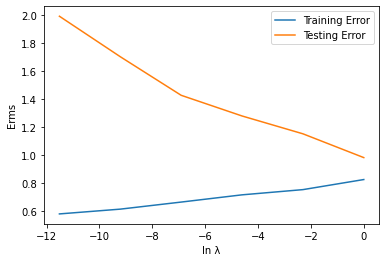

In [ ]:
print("Graph for test and train error according to lamda: ")
fig,ax = plt.subplots()
ax.plot(np.log(lamda),train_error_for_lamda, label="Training Error")
ax.plot(np.log(lamda),test_error_for_lamda, label="Testing Error")
leg = ax.legend()
plt.xlabel('ln λ')
plt.ylabel('Erms')
plt.show()

<b>J.Based on the best test performance, what is your model? </b>

From given model of X_test and Y_test and given 0, 1, 3, 9 degrees, I can conclude that for <b>Degree = 3</b>, model gives best performance of all.